# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Load the data (use delim_whitespace=True)

df = pd.read_csv('http://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)

# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [6]:
# Apply value_counts() to series for "sx", "dg", and "rk"

print df['sx'].value_counts()
print df['dg'].value_counts()
print df['rk'].value_counts()

male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64


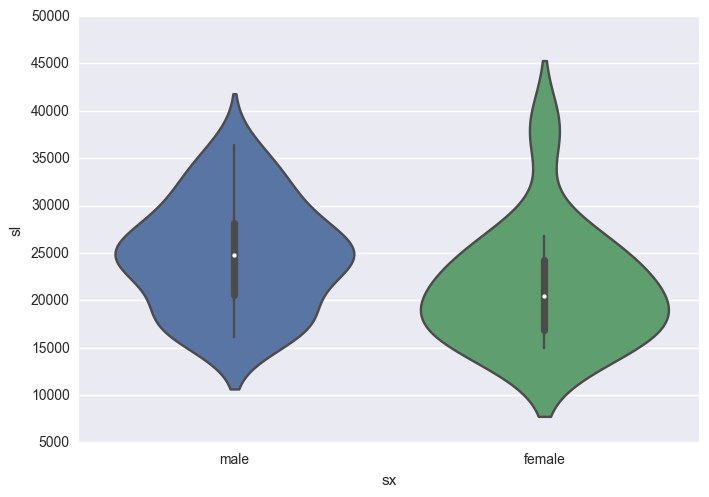

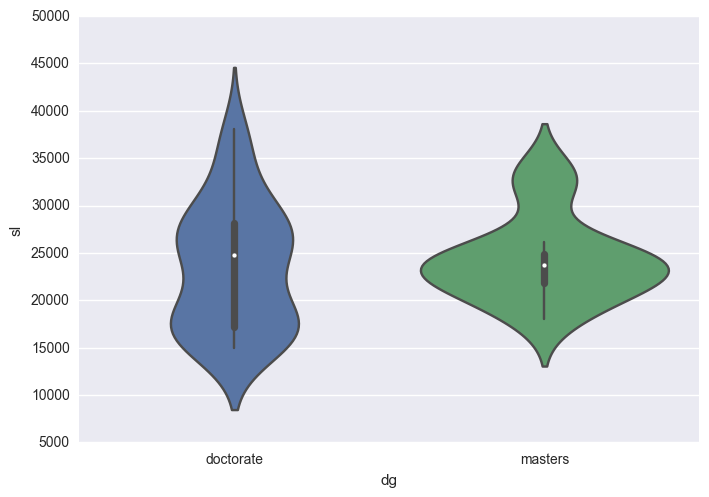

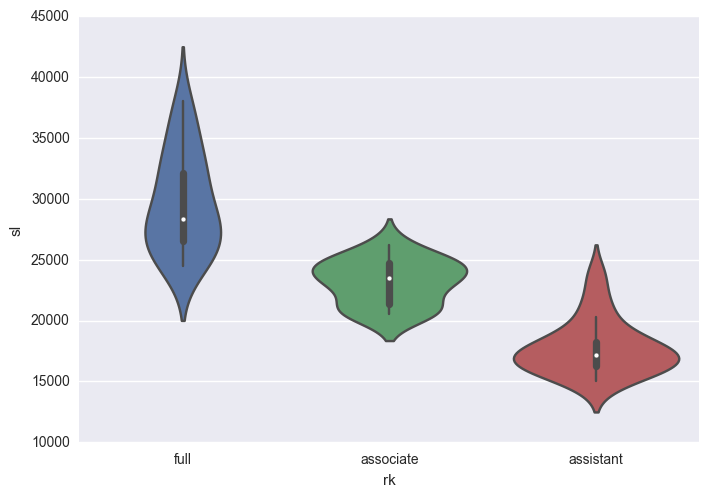

In [11]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [8]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0,1,0,0,1,1,0
1,male,full,13,doctorate,22,35350,0,1,0,0,1,1,0
2,male,full,10,doctorate,23,28200,0,1,0,0,1,1,0
3,female,full,7,doctorate,27,26775,1,0,0,0,1,1,0
4,male,full,19,masters,30,33696,0,1,0,0,1,0,1


In [ ]:
### Here's an example to get you started.

#Try reruning the next cell multiple times. You should see an improvement for some samples.

In [13]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False) #this is where we're specifically declaring how much of a subset we're looking at

X = subset[[u'yr', u'yd']] #our x will be a subset of years in current rank and number of years since highest degree was earned
y = subset[u'sl'] #our y will be the salaries

lm = linear_model.LinearRegression() 
model = lm.fit(X, y) #fit a line on the SUBSET of data
predictions = model.predict(X) #making predictions based on that 
print "Sample:", model.score(X, y) #checking how well our model that was built on the subset of data performed 

# Apply to the whole data set

X = df[[u'yr', u'yd']] #redeclaring our X so it includes every observation in our dataset
y = df[u'sl'] #and our y covers every salary observation
print "All data with sample model:", model.score(X, y) #and then look at how well our model (fit on the subset of data) performs against the entire dataset

# Repeat with regularization

X = subset[[u'yr', u'yd']] #we're again creating a subset here
y = subset[u'sl'] #and here

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas 
model = lm.fit(X, y) #and then fit a line WITH REGULARISATION
predictions = model.predict(X) #we then generate predicted values _just based on the X_ (which we also used to fit the model)
print "Sample with regularization:", model.score(X, y) #and then look at how well this performs 

# Apply to the whole data set

X = df[[u'yr', u'yd']] 
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

#why did they/why didn't they?

Sample: 0.725818934778
All data with sample model: 0.103751049336
Sample with regularization: 0.705506091557
All data with regularization model: 0.312602915958


0.88630543814


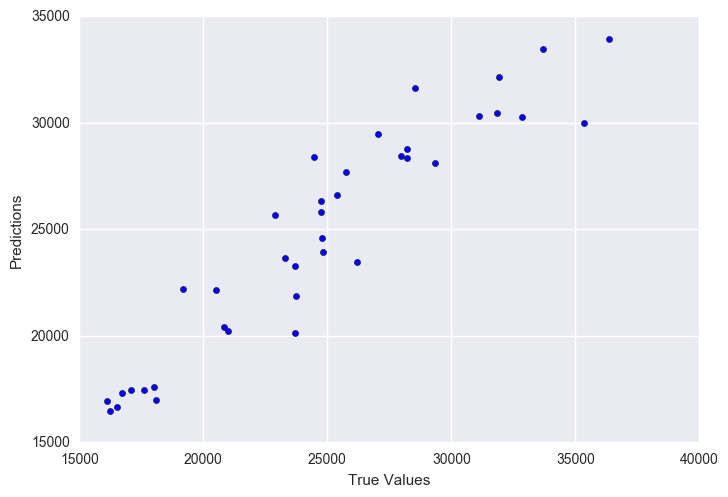

0.69448811957


In [17]:
# Fit a model to the men
mask = df["sx"] == "male" #print mask to check what it's doing
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl'] 

mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression() #instantiate model
model = lm.fit(X, y) #fit a line
predictions = lm.predict(X) #generate predicted values based on the independent variables
print lm.score(X, y) #generate a score

plt.scatter(y, predictions) #plot the actual values against the predicted values
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to women
mask = df["sx"] == "female" #apply that mask to women
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y) #and look at how the model built does on the data for women


0.781837240731


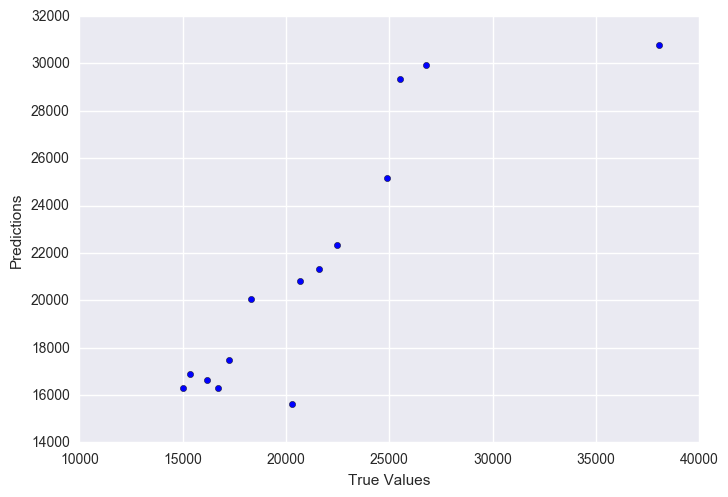

0.657523429275


In [18]:
# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y)

alpha: 0.9
0.758307796614


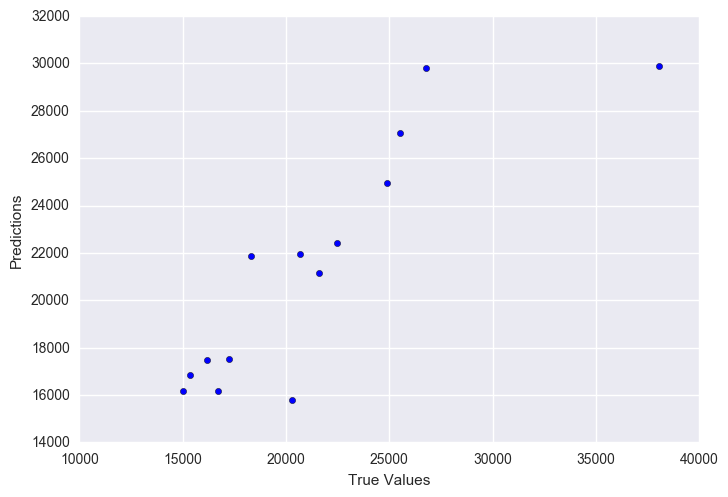

0.72733196433


In [19]:
# This time use regularlization (RidgeCV)

# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1)) #take a look at what np.arange is doing and how many alphas this is running through
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y)

### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

0.876486548837


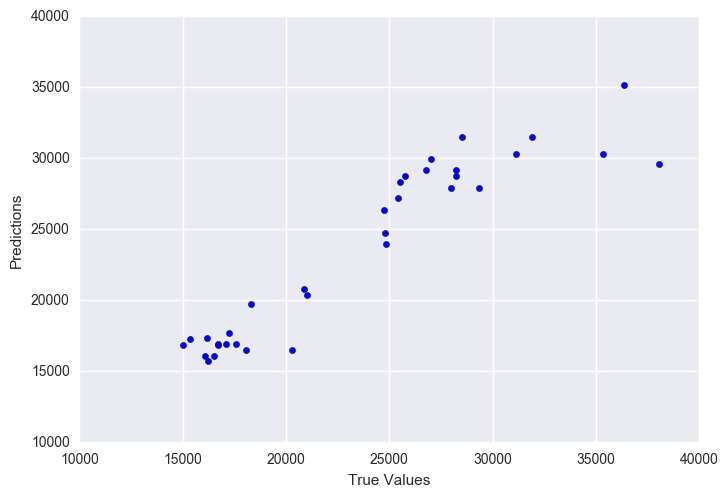

0.6849888843


In [20]:
mask = (df["dg"] == "doctorate")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] != "doctorate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)

0.797682614586


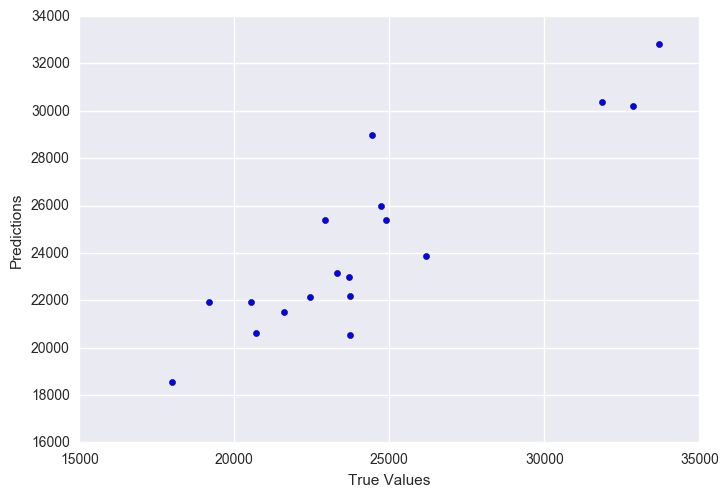

0.745050571834


In [21]:
# Change the order

mask = (df["dg"] != "doctorate") # !=

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] == "doctorate") # ==
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)

alpha: 1.0
0.763135476913


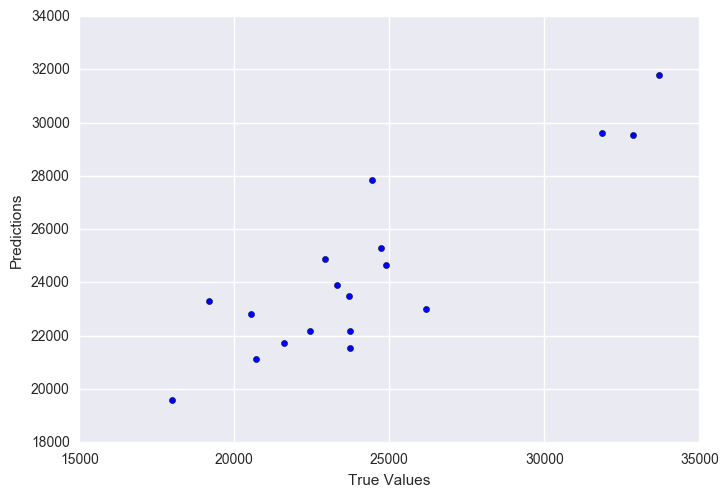

0.769420627361


In [22]:
# With regularization

mask = (df["dg"] != "doctorate") # !=

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=np.arange(1, 2, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] == "doctorate") # ==
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

full: 0.518546885368


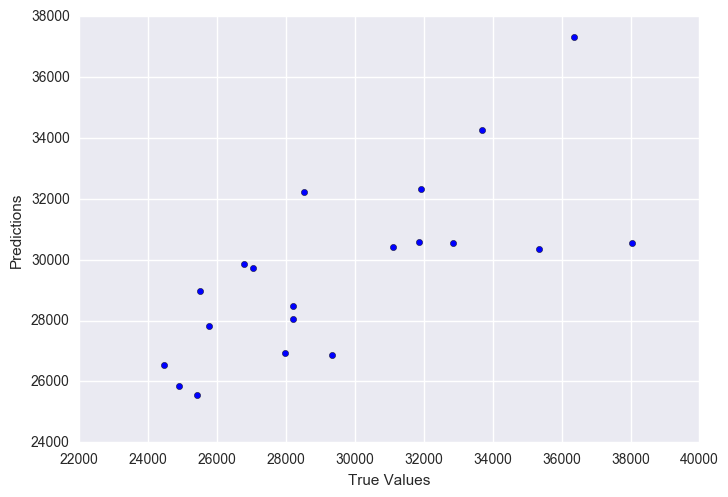

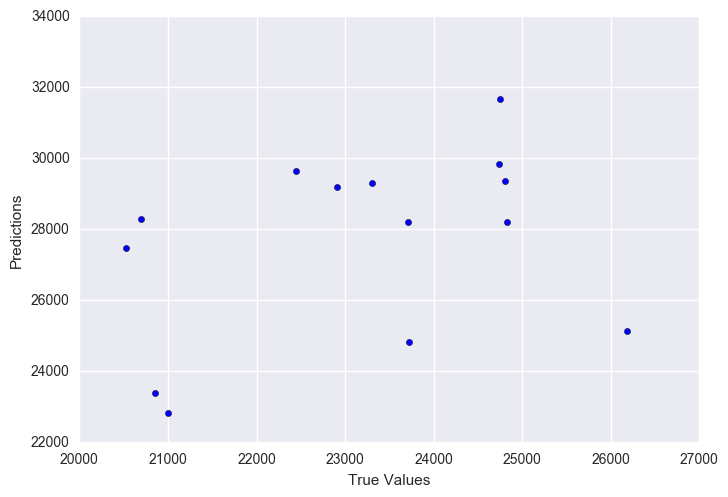

associate: -7.45265423236


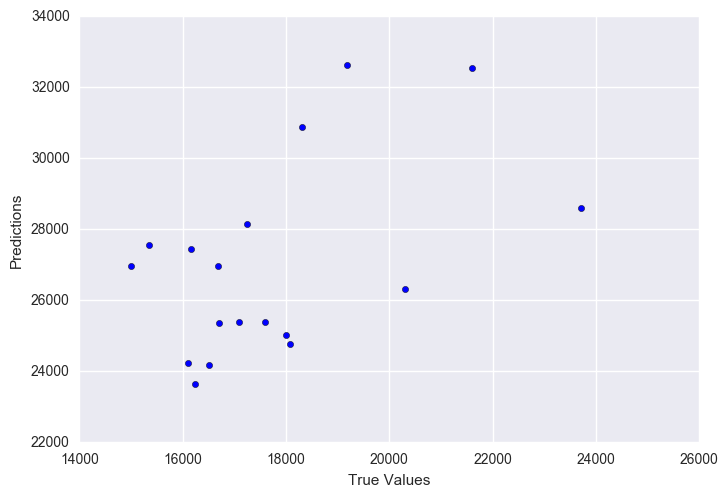

assistant: -18.353149193


In [23]:
from sklearn.metrics import r2_score

mask = (df["rk"] == "full")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

print "associate:", r2_score(y, predictions)

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

print "assistant:", r2_score(y, predictions)

In [24]:
# The second permutation of three

mask = (df["rk"] == "associate")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "associate:", r2_score(y, predictions)

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "assistant:", r2_score(y, predictions)

associate: 0.621136292896
full: -2.60749883815
assistant: -7.96517263065


In [25]:
# The third permutation of three
mask = (df["rk"] == "assistant")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "assistant:", r2_score(y, predictions)

predictions = lm.predict(X)

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "associate:", r2_score(y, predictions)

assistant: 0.515603387509
full: -8.39910384198
associate: -5.80743845944


# Results

As you can see, fitting a model on any of the subsets does not produce good model for the others. In this case regularization won't help much.


### Bonus

Try predicting "yd" by splitting the data on "sx".

0.926177658276


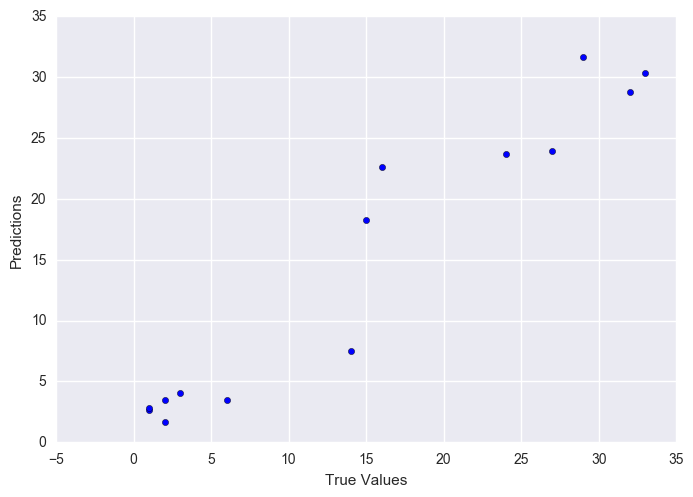

0.0479508851501


In [26]:
# Without regularization
mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

lm = linear_model.LinearRegression()
# lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
# print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 0.7
0.913172982834


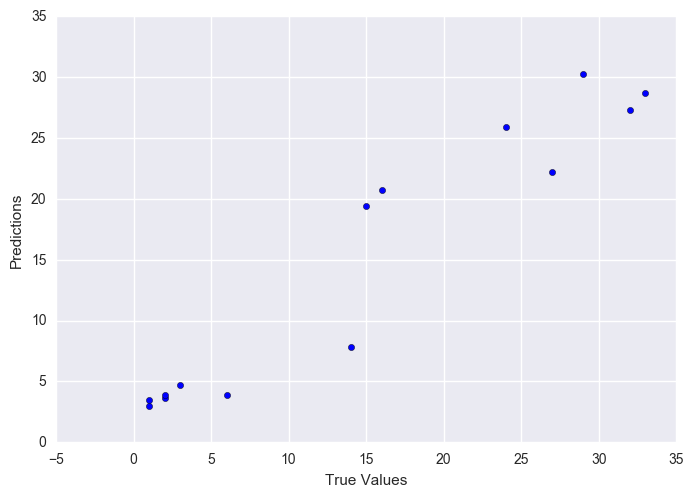

0.199081911313


In [27]:
# With regularization, RidgeCV

mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

# lm = linear_model.LinearRegression()
lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 0.1
0.924651162377


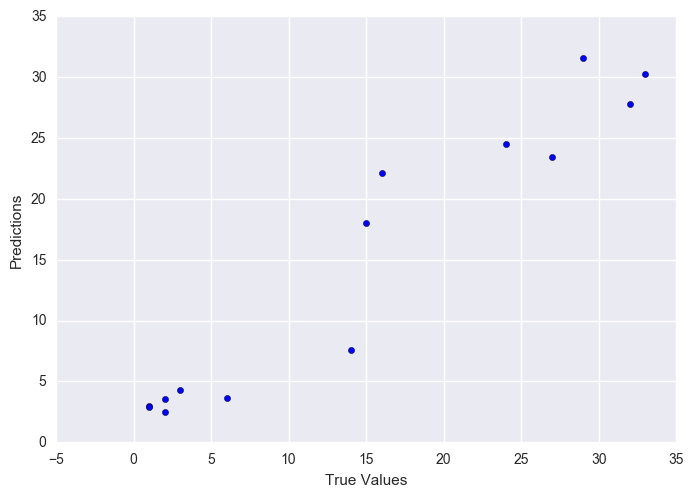

0.0630933485075


In [28]:
# With regularization, LassoCV
mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

# lm = linear_model.LinearRegression()
lm = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 9.9
0.462516963657


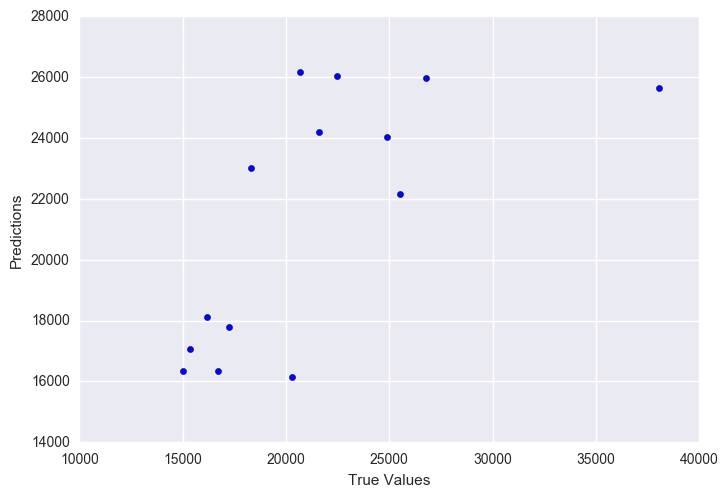

0.570804838863


In [29]:
# This time use regularization

# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()
lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd']]
y = df[mask][u'sl']
print lm.score(X, y)